<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.894234,74.594792,21.514392,-1665.660856,-1486.657438,588.691859,-2075.349297
1,0.0,1.0,40.588217,20.174928,68.190282,-212.030471,-73.077044,914.780511,-987.857555
2,0.0,2.0,71.322852,73.963648,44.228528,935.144746,1134.659775,250.822451,883.837324
3,0.0,3.0,65.152204,73.012979,56.870562,1282.069338,1487.105084,-114.720034,1601.825118
4,0.0,4.0,44.658511,45.144087,58.747214,-181.286828,-22.737016,196.182351,-218.919367
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.536226,30.149941,21.045935,-5.868204,127.863898,3.636203,124.227695
19996,999.0,16.0,37.180644,57.123196,69.833310,-2628.348872,-2454.211721,-228.776826,-2225.434896
19997,999.0,17.0,53.200849,64.303537,61.470237,2738.328628,2927.303251,353.065410,2574.237841
19998,999.0,18.0,81.728952,74.505151,33.478208,4192.540234,4392.252545,1644.853691,2747.398854


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    72.894234  74.594792  21.514392 -1665.660856 -1486.657438   
      1.0    40.588217  20.174928  68.190282  -212.030471   -73.077044   
      2.0    71.322852  73.963648  44.228528   935.144746  1134.659775   
      3.0    65.152204  73.012979  56.870562  1282.069338  1487.105084   
      4.0    44.658511  45.144087  58.747214  -181.286828   -22.737016   
...                ...        ...        ...          ...          ...   
999.0 15.0   72.536226  30.149941  21.045935    -5.868204   127.863898   
      16.0   37.180644  57.123196  69.833310 -2628.348872 -2454.211721   
      17.0   53.200849  64.303537  61.470237  2738.328628  2927.303251   
      18.0   81.728952  74.505151  33.478208  4192.540234  4392.252545   
      19.0   71.717763  65.007033  92.652106    73.133793   312.510696   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     588.691859 -2075.349297  
      1.0     914.780511  -987.857555  
      2.0     250.822451   883.837324  
      3.0    -114.720034  1601.825118  
      4.0     196.182351  -218.919367  
...                  ...          ...  
999.0 15.0      3.636203   124.227695  
      16.0   -228.776826 -2225.434896  
      17.0    353.065410  2574.237841  
      18.0   1644.853691  2747.398854  
      19.0   -470.288165   782.798861  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    72.894234  74.594792  21.514392 -1665.660856 -1486.657438   
      1.0    40.588217  20.174928  68.190282  -212.030471   -73.077044   
      2.0    71.322852  73.963648  44.228528   935.144746  1134.659775   
      3.0    65.152204  73.012979  56.870562  1282.069338  1487.105084   
      4.0    44.658511  45.144087  58.747214  -181.286828   -22.737016   
...                ...        ...        ...          ...          ...   
999.0 15.0   72.536226  30.149941  21.045935    -5.868204   127.863898   
      16.0   37.180644  57.123196  69.833310 -2628.348872 -2454.211721   
      17.0   53.200849  64.303537  61.470237  2738.328628  2927.303251   
      18.0   81.728952  74.505151  33.478208  4192.540234  4392.252545   
      19.0   71.717763  65.007033  92.652106    73.133793   312.510696   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     588.691859 -2075.349297  
      1.0     914.780511  -987.857555  
      2.0     250.822451   883.837324  
      3.0    -114.720034  1601.825118  
      4.0     196.182351  -218.919367  
...                  ...          ...  
999.0 15.0      3.636203   124.227695  
      16.0   -228.776826 -2225.434896  
      17.0    353.065410  2574.237841  
      18.0   1644.853691  2747.398854  
      19.0   -470.288165   782.798861  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.894234,74.594792,21.514392,-1665.660856,-1486.657438,588.691859,-2075.349297
1,0.0,1.0,40.588217,20.174928,68.190282,-212.030471,-73.077044,914.780511,-987.857555
2,0.0,2.0,71.322852,73.963648,44.228528,935.144746,1134.659775,250.822451,883.837324
3,0.0,3.0,65.152204,73.012979,56.870562,1282.069338,1487.105084,-114.720034,1601.825118
4,0.0,4.0,44.658511,45.144087,58.747214,-181.286828,-22.737016,196.182351,-218.919367
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,72.536226,30.149941,21.045935,-5.868204,127.863898,3.636203,124.227695
19996,999.0,16.0,37.180644,57.123196,69.833310,-2628.348872,-2454.211721,-228.776826,-2225.434896
19997,999.0,17.0,53.200849,64.303537,61.470237,2738.328628,2927.303251,353.065410,2574.237841
19998,999.0,18.0,81.728952,74.505151,33.478208,4192.540234,4392.252545,1644.853691,2747.398854


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    72.894234  74.594792  21.514392 -1665.660856 -1486.657438   
      1.0    40.588217  20.174928  68.190282  -212.030471   -73.077044   
      2.0    71.322852  73.963648  44.228528   935.144746  1134.659775   
      3.0    65.152204  73.012979  56.870562  1282.069338  1487.105084   
      4.0    44.658511  45.144087  58.747214  -181.286828   -22.737016   
...                ...        ...        ...          ...          ...   
999.0 15.0   72.536226  30.149941  21.045935    -5.868204   127.863898   
      16.0   37.180644  57.123196  69.833310 -2628.348872 -2454.211721   
      17.0   53.200849  64.303537  61.470237  2738.328628  2927.303251   
      18.0   81.728952  74.505151  33.478208  4192.540234  4392.252545   
      19.0   71.717763  65.007033  92.652106    73.133793   312.510696   

                   y_hat        e_hat  
rep   index                            
0.0   0.0     588.691859 -2075.349297  
      1.0     914.780511  -987.857555  
      2.0     250.822451   883.837324  
      3.0    -114.720034  1601.825118  
      4.0     196.182351  -218.919367  
...                  ...          ...  
999.0 15.0      3.636203   124.227695  
      16.0   -228.776826 -2225.434896  
      17.0    353.065410  2574.237841  
      18.0   1644.853691  2747.398854  
      19.0   -470.288165   782.798861  

[20000 rows x 7 columns]

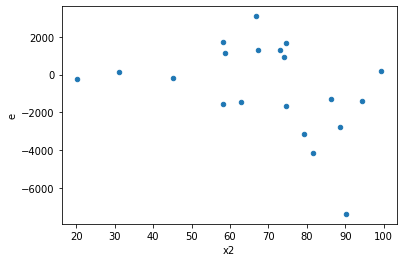

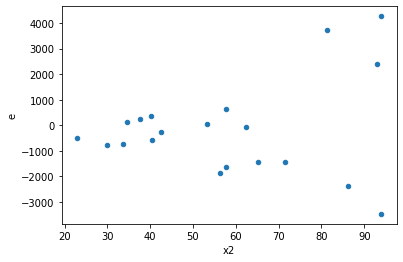

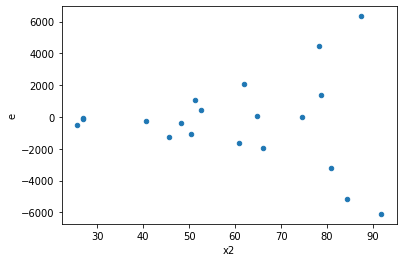

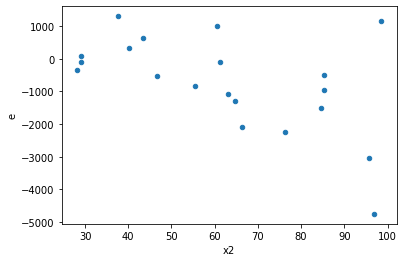

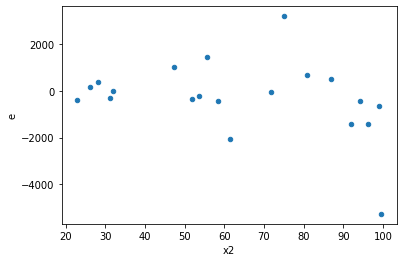

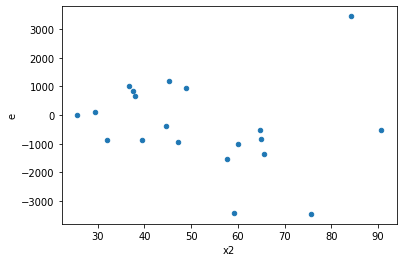

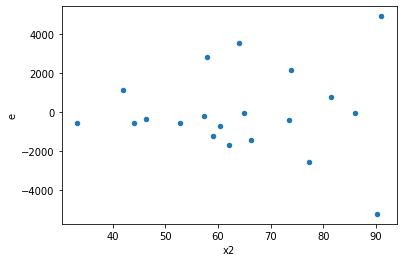

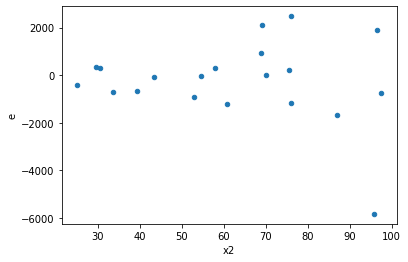

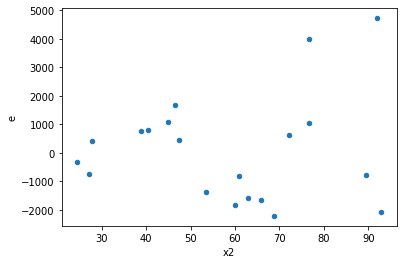

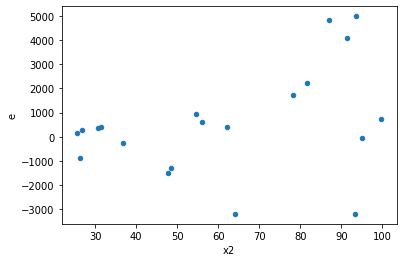

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,5.0,14218872.003519855,30066755.490596786,1579874.6670577617,6013351.098119358,3.8062203436163484,0.15506721258316447,0.9224663937084178,0.07753360629158224,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,298904.19662453514,34119558.69036904,74726.04915613378,3411955.869036904,45.659524457233246,4.327775470436279e-06,0.9999978361122648,2.1638877352181396e-06,Reject001=0 : Heteroscedasticity
6.0,6.0,8.0,13612462.4374036,51040408.37007819,2268743.739567267,6380051.046259774,2.8121514717553273,0.17797496171788785,0.9110125191410561,0.08898748085894392,Reject001=1 : Homoscedasticity
10.0,6.0,8.0,12983895.631263765,72256401.35884924,2163982.6052106274,9032050.169856155,4.173809044540373,0.06717695108712674,0.9664115244564366,0.03358847554356337,Reject001=1 : Homoscedasticity
12.0,9.0,5.0,7758739.323606,75399557.76031236,862082.1470673333,15079911.552062472,17.49242993067649,0.0057303390842045054,0.9971348304578977,0.0028651695421022527,Reject001=0 : Heteroscedasticity
13.0,8.0,6.0,12227417.513740543,9707195.869021112,1528427.189217568,1617865.9781701853,1.0585168790398207,0.9722968137650487,0.5138515931174756,0.48614840688252436,Reject001=1 : Homoscedasticity
15.0,4.0,10.0,1539320.7068672145,45427391.21060196,384830.17671680363,4542739.121060196,11.804529363618997,0.0016716815850070788,0.9991641592074965,0.0008358407925035394,Reject001=0 : Heteroscedasticity
16.0,10.0,4.0,11849004.280118423,11675909.807302047,1184900.4280118423,2918977.4518255116,2.463479109990108,0.3991252492353663,0.8004373753823169,0.19956262461768315,Reject001=1 : Homoscedasticity
18.0,5.0,9.0,8667343.139087042,73773812.28263243,1733468.6278174084,8197090.253625825,4.7287214329033995,0.0428355684508559,0.978582215774572,0.02141778422542795,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,14218872.003519855,30066755.490596786,1579874.6670577617,6013351.098119358,3.8062203436163484,0.15506721258316447,Reject001=1 : Homoscedasticity
1.0,8.0,6.0,20285546.961592447,7033835.663652544,2535693.370199056,1172305.9439420907,0.4623216504486356,0.30886437864630356,Reject001=1 : Homoscedasticity
2.0,8.0,6.0,71709131.24245639,46983705.41228336,8963641.405307049,7830617.568713893,0.8735978175206415,0.8350870674581405,Reject001=1 : Homoscedasticity
3.0,5.0,9.0,19686878.354292247,4170543.2639479586,3937375.6708584493,463393.69599421765,0.11769100404208722,0.029735325915354677,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,298904.19662453514,34119558.69036904,74726.04915613378,3411955.869036904,45.659524457233246,4.327775470436279e-06,Reject001=0 : Heteroscedasticity
5.0,8.0,6.0,12552715.795908911,7885285.166899881,1569089.474488614,1314214.1944833135,0.8375648526427293,0.7935527224175415,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,13612462.4374036,51040408.37007819,2268743.739567267,6380051.046259774,2.8121514717553273,0.17797496171788785,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,13581680.368858462,5937259.616708833,1940240.052694066,848179.9452441189,0.4371520648006428,0.2972265256296212,Reject001=1 : Homoscedasticity
8.0,10.0,4.0,50780812.000425406,5161421.546293654,5078081.20004254,1290355.3865734134,0.25410294474271183,0.07179920305385475,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      750
Reject001=0 : Heteroscedasticity    250
Name: Result_test, dtype: int64